In [1]:
import matplotlib
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

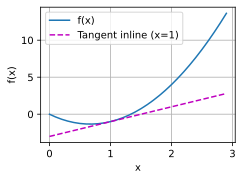

In [4]:
x= np.arange(0,3,0.1)
d2l.plot(x,[f(x),2*x-3],'x','f(x)',legend=['f(x)','Tangent inline (x=1)'])

In [2]:
import torch
x=torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [3]:
x.requires_grad_(True)   #等价于x=torch.arange(4.0,requires_grad=True)  要求保留梯度信息
x.grad

In [15]:
y=2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [16]:
y.backward()      #反向传播计算梯度

x.grad


tensor([ 0., 20., 40., 60.])

tensor([ 0., 16., 32., 48.])

In [17]:
x.grad.zero_()     #默认情况下pytorch会累积梯度，我们需要清除之前的值

tensor([0., 0., 0., 0.])

In [28]:
f=3*torch.dot(x,x)
f.backward()      #使用一次反向传播计算出的梯度会自动累加到x.grad中去，不管你使用的是哪个函数计算，只要用到了x并对他用了backward就会。
x.grad

tensor([ 0., 12., 24., 36.], grad_fn=<ZeroBackward0>)

In [19]:
x.grad=3*x

In [20]:
x.grad

tensor([0., 3., 6., 9.], grad_fn=<MulBackward0>)

In [21]:
x.grad.zero_()

tensor([0., 0., 0., 0.], grad_fn=<ZeroBackward0>)

In [3]:
f=3*torch.dot(x,x)



In [4]:
f.backward()

In [5]:
f.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [6]:
x.grad==6*x

tensor([True, True, True, True])

In [7]:
y=2*torch.dot(x,x)

In [8]:
y.backward()
x.grad

tensor([ 0., 10., 20., 30.])

In [9]:
y=x.sum()
x.grad.zero_()
y.backward()
x.grad


tensor([1., 1., 1., 1.])

In [4]:
#x.grad.zero_()
y=x*x       #y是向量的情况
y.sum().backward()
x.grad


tensor([0., 2., 4., 6.])

In [5]:
x.grad.zero_()
y=x*x
u=y.detach()   #将u从z关于x的计算图中分离出来
z=u*x
z.sum().backward()
x.grad==u

tensor([True, True, True, True])

In [6]:
x.grad.zero_()
y.sum().backward()
x.grad==2*x

tensor([True, True, True, True])

In [7]:
def f(a):
    b=a*2
    while b.norm()<1000:
        b*=2
    if b.sum()>0:
        c=b
    else:
        c=100*b
    return c
a=torch.randn(size=(),requires_grad=True)
d=f(a)
d.backward()
        

In [8]:
a,d,a.grad

(tensor(-0.4043, requires_grad=True),
 tensor(-165590.2656, grad_fn=<MulBackward0>),
 tensor(409600.))

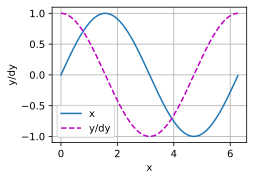

In [49]:
#绘制f(x)sin（x），以及
def F(x):
    return torch.sin(x)
def dF(x,y):
    if x.grad != None:
        x.grad.zero_()
    y.sum().backward()
    return x.grad
x=torch.arange(0,3.14*2,0.01)
x.requires_grad_(True)
y=F(x)
dy=dF(x,y)
#print(dy)
d2l.plot(x.detach(),[y.detach(),dy],'x','y/dy',legend=['x','y/dy'])   
#画图的时候这个函数会自动将x,y转化为np.array类型而x，y中由于保留了梯度信息，直接转化会丢失这些信息，所以会报错，因此要先将它从计算图中抽离出来
